### PCA

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [112]:
#generate nonlinear data
m=100
X1 = 1* np.random.rand(m)
X2 = 2* np.random.rand(m)
X3 = 3* np.random.rand(m)
X4 = 4* np.random.rand(m)
X5 = 5* np.random.rand(m)
X6 = 6* np.random.rand(m)

X=pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'X3':X3,
    'X4':X4,
    'X5':X5,
    'X6':X6
    })
y=7* np.random.rand(m)

In [76]:
X

,X1,X2,X3,X4,X5,X6
0,0.724444,0.116799,0.838517,3.023689,0.545265,5.871504
1,0.158983,0.487707,2.775100,3.123343,4.895913,5.704038
2,0.672846,1.674526,0.449117,0.207412,4.360442,0.443245
3,0.709237,0.572540,2.990120,2.436748,1.536632,5.792578
4,0.430432,1.726421,1.018298,1.238528,0.966121,4.742248
5,0.642721,1.995057,1.445520,3.403705,3.353799,0.116052
6,0.450809,0.351941,1.884845,0.741454,2.438705,2.292930
7,0.309331,0.721408,2.278316,2.777869,1.569393,1.864759
8,0.667589,1.268913,1.298494,3.443225,0.920733,4.386191
9,0.728807,0.450658,2.830155,2.657803,1.220468,2.174797


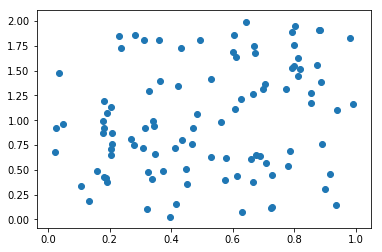

In [77]:
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.show()

In [78]:
#uses numpy's svd() function to obtain all the principal components of the training set, then extracts the first two PCs
#doesn't work on this for some reason?
X_centered = X-X.mean()
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [79]:
# using Scikit-learn
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

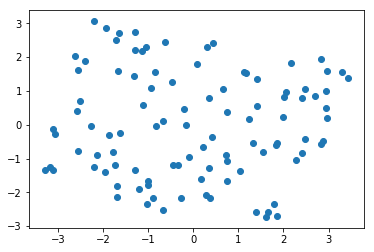

In [84]:
plt.scatter(X2D[:,0], X2D[:,1])

In [85]:
#explained variance ratio of each principle component
#indicates the proportion of the dataset's variance that lies along the axis of each principal component
pca.explained_variance_ratio_

array([0.4071091 , 0.29062504])

^^ This tells you that 40.7% of the dataset's variance lies along the first axis and 29% lies along the second axis
- This leaves about 30% for the third axis so it is reasonable to assume another axis can carry good information

### Choosing the right number of dimensions

In [92]:
pca=PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_) #shows the cumulative sum of each PC from highest to lowest
d = np.argmax(cumsum >= .95) + 1 #d represents the number of PCs you need to preserve 95% of the variance
print(f"Number of Dimensions to Preserve Variance 95%: {d}")
#now you can set n_components=d and run pca again

Number of Dimensions to Preserve Variance 95%: 4


In [96]:
#OR you can use this much easier way
pca = PCA(n_components=.95)
X_reduced = pca.fit_transform(X)
X_reduced.shape #notice how it chose 4 dimensions

(100, 4)

### Dimension Decompression

In [98]:
pca = PCA(n_components = 4)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

In [105]:
#randomized pca
rnd_pca = PCA(n_components = 4, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X)

### Kernel PCA

In [107]:
from sklearn.decomposition import KernelPCA

#can try various kernels: linear/RBF/Sigmoid
rbf_pca = KernelPCA(n_components = 2, kernel='rbf', gamma=.04)
X_reduced = rbf_pca.fit_transform(X)

In [119]:
#Selecting a kernel and tuning hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LinearRegression())
])

param_grid = [{
    'kpca__gamma': np.linspace(.03, .05, 10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

C:\Users\jashcrof\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [120]:
print(grid_search.best_params_)

{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}


In [122]:
#train supervised regression model with projected instances as the training set and original instances as targets
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [123]:
#compute reconstruction pre_image error
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

0.6319673125532521

now you can use grid search w/ CV to find the kernel/hyperparameters that minimize pre-image reconstruction error

### LLE (Locally Linear Embedding)

In [124]:
#first measures how each training instance linearly relates to its closest neighbors
#then, looks for a low dimensional representation to preserve these relationships
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)